<a href="https://colab.research.google.com/github/elifgunay1997/elifgunay/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello, in this article, I made machine learning prediction step by step using the titanic data set.

When writing code, I usually try to install the necessary libraries in the top lines.

# Import Libraries

In [1]:
#data processing libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sbn
import matplotlib.pyplot as plt

# measuring the success score of the model
from sklearn.metrics import accuracy_score

# Separate different columns for scaling and training
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Do not show warnings!
import warnings
warnings.filterwarnings("ignore")

# Classification algorithms I use in the model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df1 = pd.read_csv("train.csv")
df2 = pd.read_csv("test.csv")

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Let's learn about NaN (missing value) numbers in Dataframes.
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Let's look at the dimensions for both dataframes.
df1.shape, df2.shape

((891, 12), (418, 11))

In [10]:
#Now let's fill in the empty values ​​(NaN), but to make it easier,
#let's combine the two dataframes and perform the operations.

df = pd.concat([df1, df2])#like append
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


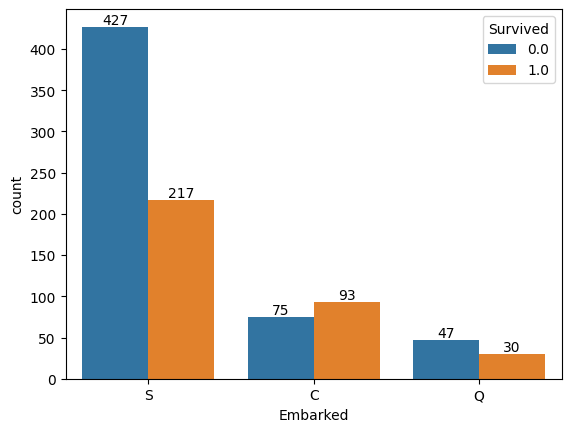

In [12]:
df["Fare"].mean, df["Fare"].min(), df["Fare"].max(), df["Fare"].std()
# Average, minimum, maximum and standard deviation values ​​for the mouse column
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
# Let's fill the mouse column with the average.
df = df.reset_index(drop=True)
ax = sbn.countplot(x = df["Embarked"], hue = df["Survived"])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
## Let's graph the embarked and survived columns.

In [13]:
#Now I can use averages or most frequent values ​​to fill in the blank values.
df["Embarked"].value_counts() # How many people boarded from which port?
df["Embarked"].value_counts(normalize = True) #shows percentage
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]) # Fill the Embarked column with the mode value.
#del df["Cabin"]
#Since 77% of cabin values ​​are empty, let's delete this column
# df.drop("Cabin", axis = 1,inplace = True)

Let's separate the important names and ranks in the **Name** column and group the ones that mean the same thing.

In [14]:
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.", expand = False)
df["Title"].unique() # Shows each different title value.

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

We can group different data as we see them with the **unique()** method above.

In [15]:
df["Title"] = df["Title"].replace(["Ms","Mlle"],"Miss") #replace ms and mlle with miss
df["Title"] = df["Title"].replace(["Mme","Countess","Lady","Dona"],"Mrs")
df["Title"] = df["Title"].replace(["Dr","Major","Col","Sir","Rev","Jonkheer","Capt"],"Mr")
df["Title"].value_counts()

Title
Mr        782
Miss      264
Mrs       201
Master     61
Don         1
Name: count, dtype: int64

In the last part, why I did not delete the Title column is because
the names and ranks in this column can be thought of as giving priority and importance to those people. An example would be giving priority to a general instead of a normal person in a disaster.

Let's fill in the blank values ​​in the Age column.

In [16]:
df.groupby("Title")["Age"].mean() #groups by gender and finds the average of ages

Title
Don       40.000000
Master     5.482642
Miss      21.824366
Mr        32.799174
Mrs       36.971264
Name: Age, dtype: float64

In [17]:
df.groupby("Title")["Age"].median()

Title
Don       40.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [18]:
df["Age"] = df["Age"].fillna(df.groupby("Title")["Age"].transform("median")) # I filled in all the blank lines

df.isnull().sum() When we write and run this code, we see that there are 418 empty data only in the *Survived* column because, if you remember, we first combined the *train* and *test* data sets so as not to do the same operations for both. There was no *Survived* column in the *test* data set because we had to guess.

Now let's remove the unnecessary columns and add the *SibSp* and *Parch* columns and add 1. Thus, let's assign the number of family members on the ship, including themselves, to a new column called *Family*.

In [19]:
df.drop(["PassengerId","Ticket", "Name"], axis = 1, inplace = True)
df["Family"] = df["SibSp"] + df["Parch"] + 1 #total number of family members

We have completed the missing data in the dataset, but since some columns are verbal data, machine learning algorithms may not work, so we need to convert all verbal data to numerical data. Normally, we can use *Label Encoder* in this section or give the numbers we want to the values ​​we want. For example, if you say 1 for *Male* and 0 for *Female*, the code will work, but we will show Male as superior. So, using the *get_dummies()* method, we create separate columns for Male and Female, and if Male, we put 1 in the Male column, and if Female, we put 1 in the Female column.

In [20]:
data = pd.get_dummies(df, drop_first = True)
#drop_first = True, it creates a column for 4 of them and if it is not 4, it is the 5th.
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Cabin_A11,Cabin_A14,...,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,True,False,False,...,False,False,False,False,False,True,False,False,True,False
1,1.0,1,38.0,1,0,71.2833,2,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,1,False,False,False,...,False,False,False,False,False,True,False,True,False,False
3,1.0,1,35.0,1,0,53.1000,2,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,0.0,3,35.0,0,0,8.0500,1,True,False,False,...,False,False,False,False,False,True,False,False,True,False


We have completed our data set, then in order not to do everything from scratch again, let's save the data set in its final form with a .csv extension.

In [22]:
data.to_csv("titanic_last_version.csv")
# This will create a csv file with the above name in the folder you are currently working in.
# Also, if we want the index numbers not to be visible, we can use 'index = False'.

So far we have edited the Dataset, now let's code our models.

Since we did not delete the index numbers while saving in the previous section, it contains a column called *Unnamed:0*, we can delete this column with the code del data **[‘Unnamed: 0’]**.
Now let's separate the train and test datasets.



In [23]:
train_data = data.iloc[:891]
test_data = data.iloc[891:]

Let's separate the independent (x) and dependent (y) variables.

In [24]:
x = train_data.drop("Survived", axis = 1)
y = train_data["Survived"]

While setting up the model, we can try all the models using a function like the one below.

In [27]:
def classification(x,y):
    lr = LogisticRegression()
    dt = DecisionTreeClassifier(criterion = "gini") # "gini", "entropy", "log_loss"
    kn = KNeighborsClassifier()
    rf = RandomForestClassifier()
    g = GaussianNB()
    b = BernoulliNB()
    sv = SVC(kernel = "rbf") # 'linear', 'poly', 'rbf', 'sigmoid'
    gb = GradientBoostingClassifier()
    xg = XGBClassifier()

    models = [lr, dt, kn, rf, g, b, sv, gb, xg]
    model_names = ["Logistic_Regression", "Decision_Tree", "KNN", "Random_Forest", "Gaussian", "Bernoulli", "Support_Vector", "Gradient_Boost", "XGBoost"]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    scale1 = StandardScaler()
    scale2 = MinMaxScaler()
    x_train = scale1.fit_transform(x_train)
    x_test = scale1.transform(x_test)
    acc = []
    result_df = pd.DataFrame(columns = ["Model", "Accuracy"], index = model_names)

    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc.append(accuracy_score(y_test, y_pred) * 100)

    result_df["Accuracy_Score"] = acc
    return result_df.sort_values("Accuracy_Score", ascending = False)

classification(x,y)









,Model,Accuracy,Accuracy_Score
XGBoost,NaN,NaN,81.564246
Random_Forest,NaN,NaN,80.446927
Bernoulli,NaN,NaN,79.888268
Gradient_Boost,NaN,NaN,79.888268
Support_Vector,NaN,NaN,79.329609
KNN,NaN,NaN,78.770950
Decision_Tree,NaN,NaN,78.212291
Logistic_Regression,NaN,NaN,77.653631
Gaussian,NaN,NaN,62.569832


I will use *the gradient boosting classifier model*, which gives the best results when making predictions.

In [33]:
## Model

gb = GradientBoostingClassifier()

# Remove the 'Survived' column from test_data before prediction
test_data_pred = test_data.drop("Survived", axis=1)

gb.fit(x,y)
pred = gb.predict(test_data_pred) # Use the modified test data for prediction


result_gb = pd.DataFrame()
result_gb["PassengerId"] = df2["PassengerId"]
result_gb["Survived"] = pred
result_gb["Survived"] = result_gb["Survived"].astype("int64")
result_gb.to_csv("GradientBoosting_pred.csv", index = False)